# **1. Background and Problem Definition**

## Video Game Sales Analysis (1976-2024)

### **Background**
The video game industry has evolved significantly since its inception, becoming one of the largest entertainment sectors globally. This analysis explores historical video game sales data to understand market trends, consumer preferences, and industry dynamics.

### **Problem Definition**
This project aims to answer the following questions:
- What are the most successful gaming platforms in terms of sales?
- What is the relationship between critic scores and commercial success?
- Which publishers dominate the market?
- How do regional sales patterns differ across markets?


## **About the Dataset Used**
Source: [Kaggle](https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024)
. Contains a list of all video games and their sales in various markets around the world

# **2. Data Wrangling and Cleaning**

## Load and examine the data

In [103]:
# Required imports for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('vgchartz-2024.csv')

## Basic data exploration

In [105]:
def explore_data(df):
    print("Dataset Shape:", df.shape)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nData Types:\n", df.dtypes)

explore_data(df)

Dataset Shape: (64016, 14)

Missing Values:
 img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

Data Types:
 img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object


## Cleaning Data

In [106]:
def clean_data(df):
    # Convert release_date to datetime
    df['release_date'] = pd.to_datetime(df['release_date'])
    
    # Fill missing critic scores with median
    df['critic_score'].fillna(df['critic_score'].median(), inplace=True)
    
    return df


df = clean_data(df)

# **3. Exploratory Data Analysis**

In [107]:
# Summary of sales by genre
genre_sales = df.groupby('genre')[['total_sales']].sum().sort_values('total_sales', ascending=False)

# Summary of sales by platform
platform_sales = df.groupby('console')[['total_sales']].sum().sort_values('total_sales', ascending=False)

# Sales trends over time 
if 'release_date' in df.columns:
    df['release_year'] = df['release_date'].dt.year
    sales_by_year = df.groupby('release_year')[['total_sales']].sum()

# Correlation analysis
numeric_columns = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'critic_score']
correlation_matrix = df[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              na_sales  jp_sales  pal_sales  other_sales  critic_score
na_sales      1.000000  0.065091   0.684517     0.687512      0.187096
jp_sales      0.065091  1.000000   0.131796     0.082653      0.064780
pal_sales     0.684517  0.131796   1.000000     0.817030      0.162366
other_sales   0.687512  0.082653   0.817030     1.000000      0.147534
critic_score  0.187096  0.064780   0.162366     0.147534      1.000000


# **4. Data Visualization**

To better visualize the correlation matrix data, we will plot its heat map.

## Correlation Matrix 

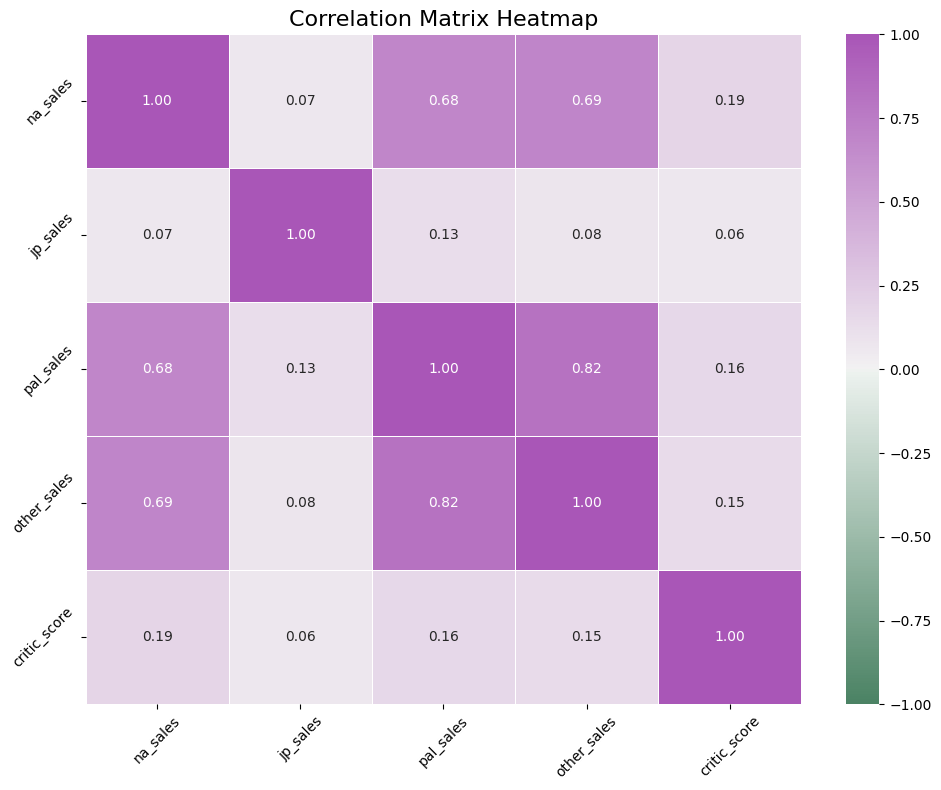

In [108]:
plt.figure(figsize=(10, 8)) 
custom_cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True), linewidths=0.5, cbar=True, vmin=-1, vmax=1,)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

## **Genre Sales Visualization**

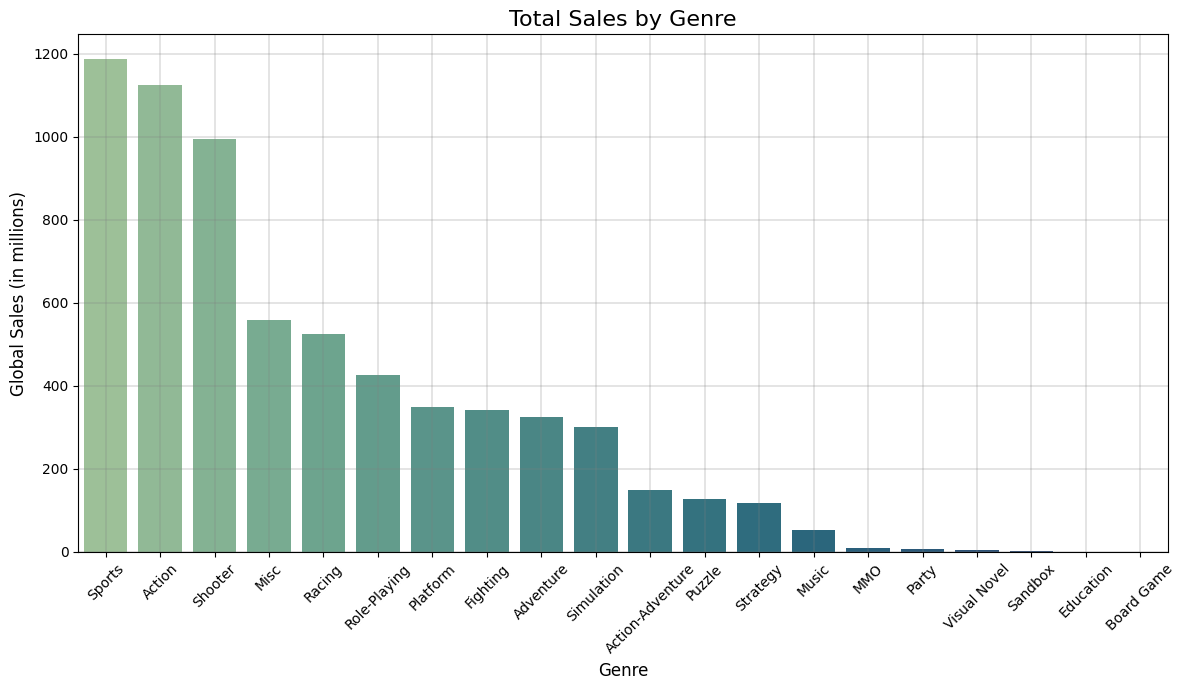

In [109]:
# Genre sales visualization
plt.figure(figsize=(12, 7))
sns.barplot(x=genre_sales.index, y=genre_sales['total_sales'], palette='crest')
plt.title('Total Sales by Genre', fontsize=16)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linewidth=0.3, color='gray')
plt.show()

### **Some key Observations**

- The two most sold genres in video games with over a 1000 million sales are Sports and Action.
- As we would expect shooters are also extremely popular coming in at the 3rd most sold genre.

## Platform sales visualization

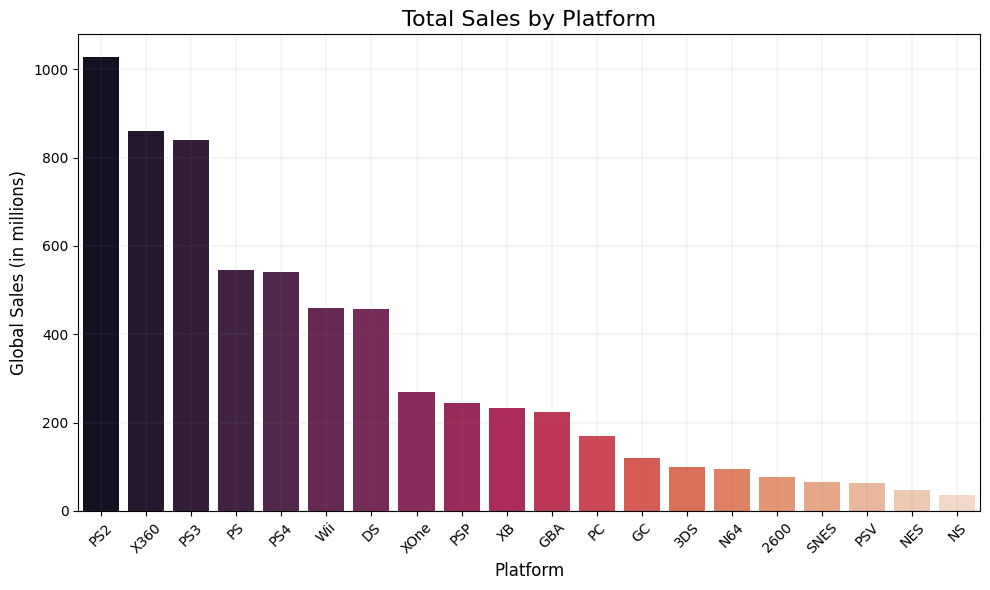

In [127]:
# since there are too many platforms, we will only show the top 10
top_10_platforms = platform_sales.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_platforms.index, y=top_10_platforms['total_sales'], palette='rocket')
plt.title('Total Sales by Platform', fontsize=16)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linewidth=0.1, color='gray')
plt.show()

**Observations**
- Notably, only the PS2 Console had sales above a 1000 million, which is not an easy feat. It goes to show just how popular the PS2 really was.
- The top 5 is mostly dominated by Sony's Playstation, with 4 out of the top 5 spots belonging to it.
- The most popular Xbox seems to be the X360, with sales of around 830 million

## Sales by Release Year

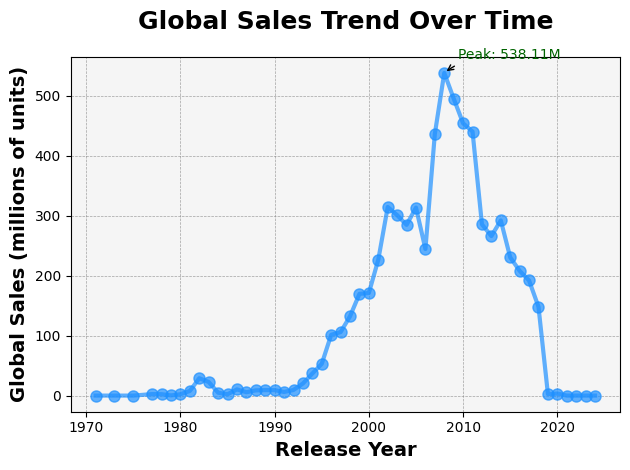

In [ ]:
plt.plot(
    sales_by_year.index,
    sales_by_year["total_sales"],
    marker="o",  # Circular markers
    linestyle="-",  # Solid line
    linewidth=3,  # Thicker line
    markersize=8,  # Larger markers
    color="#1E90FF",  # Dodger Blue - more vibrant than default blue
    alpha=0.7,
)

plt.title("Global Sales Trend Over Time", fontsize=18, fontweight="bold", pad=20)
plt.ylabel("Global Sales (millions of units)", fontsize=14, fontweight="semibold")
plt.xlabel("Release Year", fontsize=14, fontweight="semibold")

plt.grid(True, linestyle="--", linewidth=0.5, color="grey", alpha=0.7)

# Add a subtle background color
plt.gca().set_facecolor("#F5F5F5")

# Annotate the highest and lowest points
max_sales_year = sales_by_year["total_sales"].idxmax()
max_sales_value = sales_by_year.loc[max_sales_year, "total_sales"]
min_sales_year = sales_by_year["total_sales"].idxmin()
min_sales_value = sales_by_year.loc[min_sales_year, "total_sales"]

plt.annotate(
    f"Peak: {max_sales_value:.2f}M",
    xy=(max_sales_year, max_sales_value),
    xytext=(10, 10),
    textcoords="offset points",
    fontsize=10,
    color="darkgreen",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"),
)


# Adjust layout and display
plt.tight_layout()
plt.show()

**Observation** 
- This shows us how video game sales peaked in 2008 with total sales volume of 538.11 Million. 
- This graph also shows us the limitation in our dataset, as after 2010 we see a falloff in sales which should not be the case as video games have grown consistently since 2015. 
This indicates a clear lack of data for recent years.

## **Which Publishers Dominate the Market ?**

* To identify dominant publishers, we'll calculate total global sales for each publisher and rank them.

In [112]:
publisher_sales = df.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(10)

### Visualization for the Top Publishers

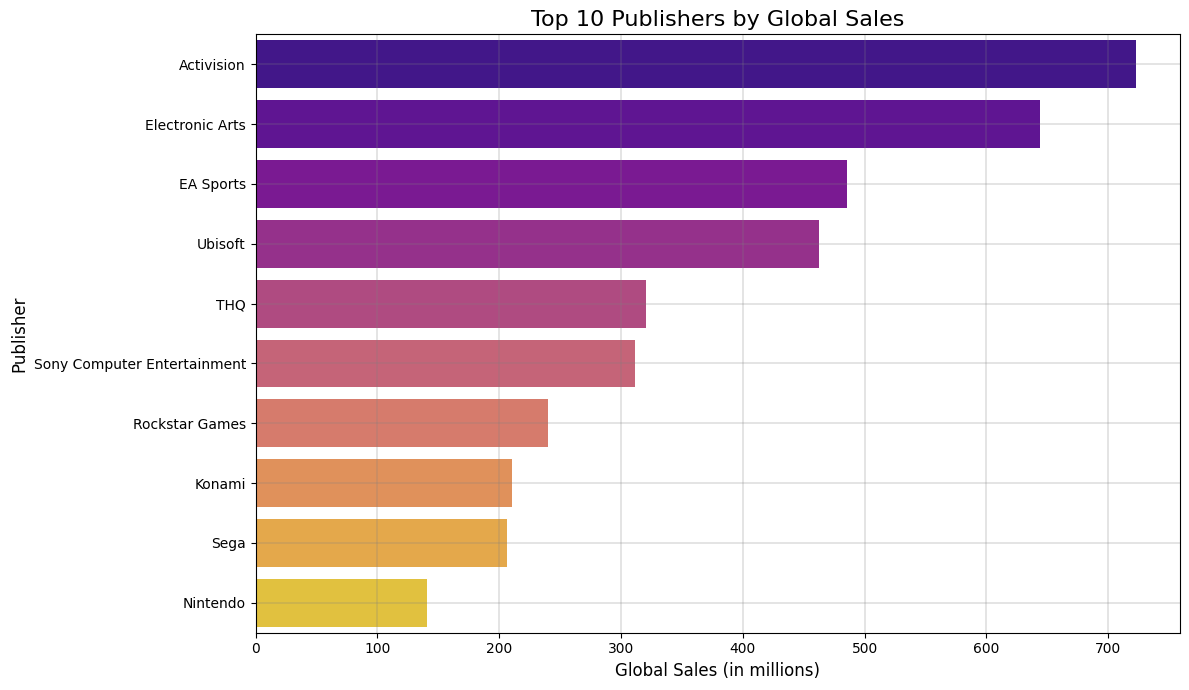

In [113]:
plt.figure(figsize=(12, 7))
sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette='plasma')
plt.title('Top 10 Publishers by Global Sales', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.tight_layout()
plt.grid(True, linewidth=0.3, color='gray')
plt.show()

Let's Look at which games from the top 3 publishers are the most popular

         publisher                           title  total_sales
0       Activision       Call of Duty: Black Ops 3        15.09
1       Activision  Call of Duty: Modern Warfare 3        14.82
2       Activision         Call of Duty: Black Ops        14.74
3        EA Sports                         FIFA 18        11.80
4        EA Sports                         FIFA 16         8.22
5        EA Sports                         FIFA 13         8.01
6  Electronic Arts                         FIFA 17        10.94
7  Electronic Arts                         FIFA 19         9.15
8  Electronic Arts    Star Wars Battlefront (2015)         8.03


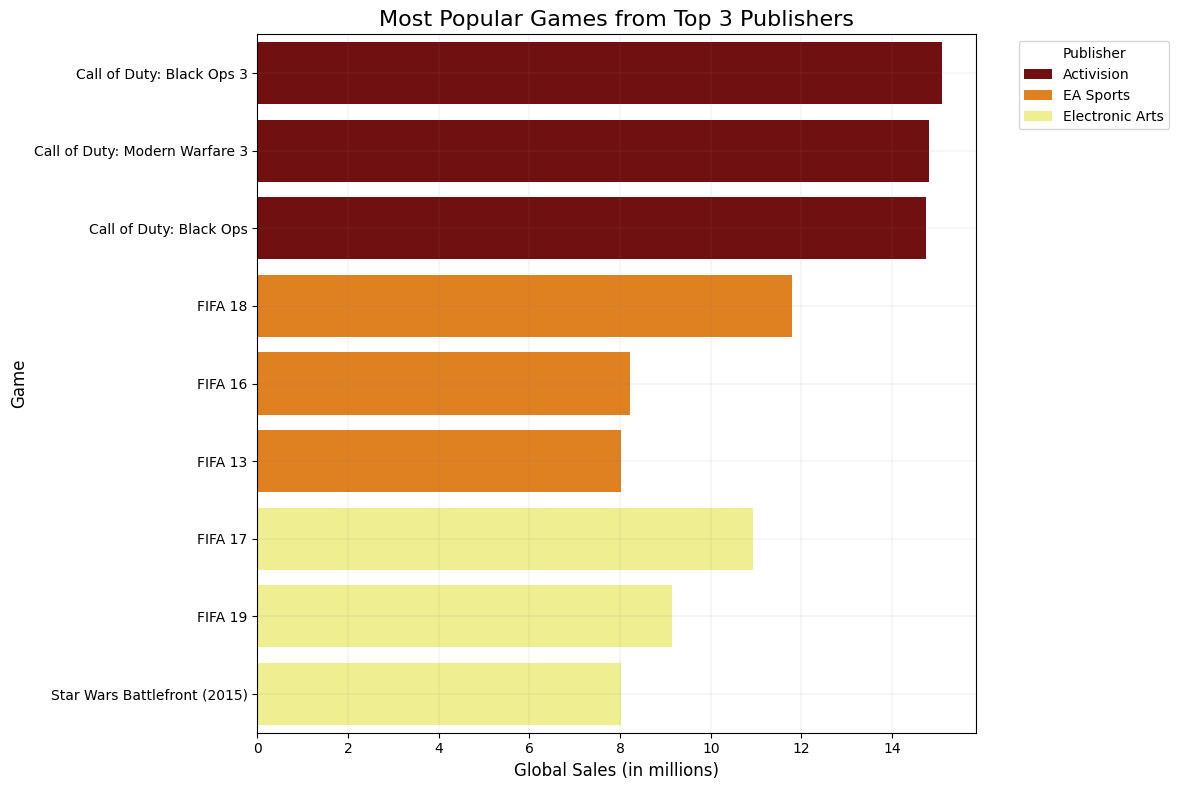

In [126]:
top_3_publishers = publisher_sales.head(3).index

top_publishers_games = df[df['publisher'].isin(top_3_publishers)]

popular_games_by_publisher = (
    top_publishers_games.groupby('publisher')
    .apply(lambda x: x.nlargest(3, 'total_sales'))
    .reset_index(drop=True)
)

print(popular_games_by_publisher[['publisher', 'title', 'total_sales']])

plt.figure(figsize=(12, 8))
sns.barplot(
    data=popular_games_by_publisher,
    x='total_sales',
    y='title',
    hue='publisher',
    dodge=False,
    palette='afmhot'
)
plt.title('Most Popular Games from Top 3 Publishers', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Game', fontsize=12)
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linewidth=0.1, color='gray')
plt.show()

- An interesting Observation here is that EA Sports and Electronic Arts are considered different publishers but both still make it to the top 3. This just goes to show how popular sports games really are, as we saw in the genre analysis.


## **Regional Sales Pattern**


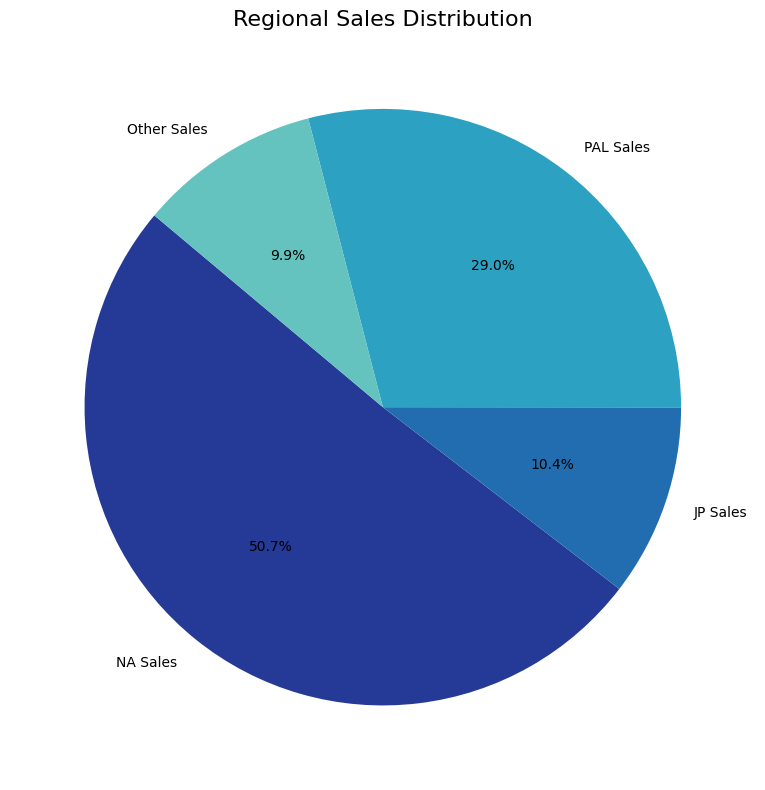

In [130]:
regional_sales = {
    'NA Sales': df['na_sales'].sum(),
    'JP Sales': df['jp_sales'].sum(),
    'PAL Sales': df['pal_sales'].sum(),
    'Other Sales': df['other_sales'].sum()
}

# Pie chart for regional sales distribution
plt.figure(figsize=(8, 8))
plt.pie(regional_sales.values(), labels=regional_sales.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('YlGnBu_r'))
plt.title('Regional Sales Distribution', fontsize=16)
plt.tight_layout()
plt.show()

### **Observations**
The distribution of sales across regions indicates a strong dominance of the North American (NA) market, which accounts for 50.7% of total sales. The Europe/Africa(PAL) region follows with a significant share of 29.0%, while the Japanese (JP) market contributes 10.4%. Sales in other regions collectively make up the remaining 9.9%.

This highlights the importance of the North American and Europe/Africa markets in driving global video game sales, while Japan and other regions, though smaller contributors, still represent key segments with notable consumer bases.

# **Key Findings**

Based on the exploratory data analysis and visualizations, we can draw the following key
observations:

1. Platform Performance:

- The most successful gaming platforms in terms of sales appear to be PS2, X360,
and PS3.

- The playstations dominate console sales
<br>
<br>

2. Genre Trends:

- Action, Sports, and Shooter genres are the most popular genre of video games.

- Some of these games incluse franchises like Fifa, Call of Duty and other
<br>
<br>
3. Critic Scores and Commercial Success:

- There's a positive correlation between critic scores and sales, particularly for NA
and PAL markets.

- However, the correlation is not very strong, suggesting that high critic scores
don't always guarantee high sales.
<br>
<br>
4. Publisher Dominance:

- A few major publishers like Electronic Arts, Activision, and Ubisoft dominate the
market in terms of total sales.

- There's a long tail of smaller publishers with fewer high-selling titles.
<br>
<br>
5. Regional Sales Patterns:

- North America and Europe/Africa (PAL regions) dominate the video games market.

# **Conclusion**

The analysis reveals significant trends in the video game industry. PlayStation consoles, such as the PS2 and PS3, lead in platform sales, solidifying their dominance in the market. Popular genres like action, sports, and shooter games, including franchises such as FIFA and Call of Duty, consistently attract players. While critic scores show a positive correlation with sales, particularly in North America and PAL regions, the correlation is moderate, indicating that high scores alone do not guarantee commercial success. The industry is largely dominated by major publishers like Electronic Arts, Activision, and Ubisoft, though smaller publishers contribute to the market's diversity. Regional sales patterns underscore the importance of North America and Europe/Africa as the primary drivers of video game sales worldwide.



# **Citation**
Brannen, B., & Asaniczka. (2024, January 29). Video game sales 2024. Kaggle. https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024